In [1]:
from scipy.interpolate import interp1d

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import pandas as pd
import os 
from nltk.corpus import stopwords

In [4]:
from extract_ESP import extract_ESP
from extract_PAC import extract_PAC

In [5]:
ESP = extract_ESP()
PAC = extract_PAC()

In [6]:
ESP = ESP.astype('float64')
PAC = PAC.astype('float64')

In [7]:
tind = [522, 536, 542, 739, 718, 551, 571, 564, 558]*4; # time*4 sample/s

In [8]:
I_col = ESP.columns[36:]

In [9]:
with open('../data/idrl/ordered_I_names.txt') as file:
    text = file.read()

In [10]:
words = text.split()

In [11]:
ESP = ESP[words]

In [12]:
tap_loc = pd.read_excel('../data/idrl/MATLAB codes/Read_data/ESP_tap_locations.xlsx',skiprows=2,
                       names=['Tap ID','x','y','z'])

In [13]:
tap_xloc_I = tap_loc[tap_loc['Tap ID'].isin(words)]

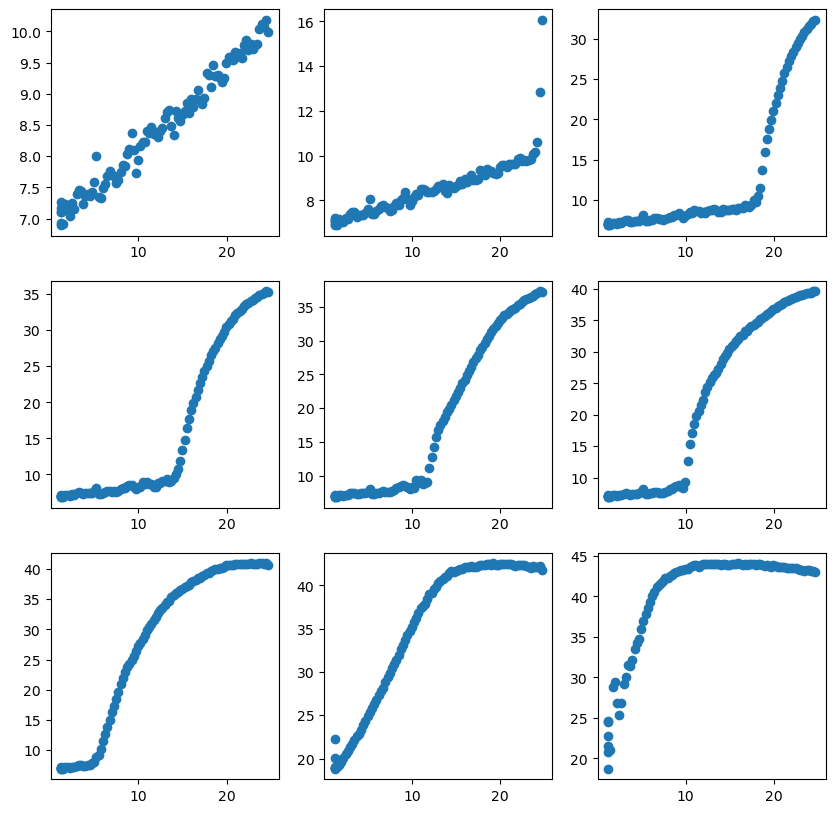

In [14]:
fig, axes = plt.subplots(3,3,figsize=(10,10))

tind = np.array([522 ,536 ,542 ,739 ,718 ,551 ,571 ,564 ,558])*4

axes[0,0].scatter(tap_xloc_I[0:100]['x'],ESP.iloc[tind[0]][0:100])
axes[0,1].scatter(tap_xloc_I[0:100]['x'],ESP.iloc[tind[1]][0:100])
axes[0,2].scatter(tap_xloc_I[0:100]['x'],ESP.iloc[tind[2]][0:100])
axes[1,0].scatter(tap_xloc_I[0:100]['x'],ESP.iloc[tind[3]][0:100])
axes[1,1].scatter(tap_xloc_I[0:100]['x'],ESP.iloc[tind[4]][0:100])
axes[1,2].scatter(tap_xloc_I[0:100]['x'],ESP.iloc[tind[5]][0:100])
axes[2,0].scatter(tap_xloc_I[0:100]['x'],ESP.iloc[tind[6]][0:100])
axes[2,1].scatter(tap_xloc_I[0:100]['x'],ESP.iloc[tind[7]][0:100])
axes[2,2].scatter(tap_xloc_I[0:100]['x'],ESP.iloc[tind[8]][0:100])
    
plt.show()

In [15]:
STLE_LOC = []
x = np.linspace(1.225,24.724,10000)
base_measure = ESP.iloc[tind[0]][0:100]

def find_base_stle_loc(x,interp1d_func, threshold=2):
    """Given pressure profile and interpolation function, return a location of cutoff for base STLE location"""
    index = np.where(f(x)>2)[0]
    if (len(index) == 0) or (index[0] == 0):
        return None
    else:
        return x[index[0]]

In [16]:
base_measure = ESP.iloc[tind[0]][0:100]

In [17]:
wall_1_tap_names = words[0:100]

In [18]:
ESP_wall_1 = ESP[wall_1_tap_names]

In [19]:
ESP_wall_1_xtap = tap_loc['x'][26:126]

In [20]:
for i in range(len(ESP_wall_1)):
    f = interp1d(ESP_wall_1_xtap, (ESP_wall_1/base_measure).iloc[i])
    STLE_LOC.append(find_base_stle_loc(x,f))

* Write a function to find STLE for all observations

In [21]:
STLE_LOC.count(None)

2916

In [22]:
ESP_wall_1['Est.STLE'] = STLE_LOC

/var/folders/p7/nw95jv590mv77sxbkj0f4wqc0000gn/T/ipykernel_83727/1828088522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESP_wall_1['Est.STLE'] = STLE_LOC


<Axes: >

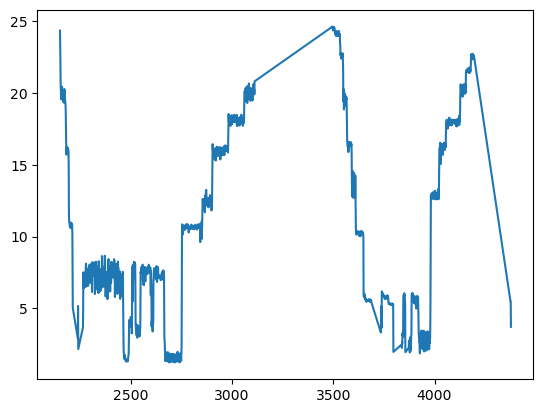

In [23]:
ESP_wall_1[ESP_wall_1['Est.STLE'].notna()]['Est.STLE'].plot()

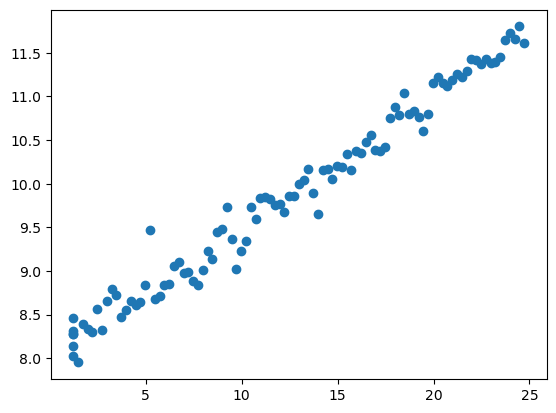

In [24]:
plt.scatter(tap_xloc_I[0:100]['x'],ESP_wall_1.iloc[1000][0:100])
plt.axvline(x=ESP_wall_1['Est.STLE'].iloc[1000],c='red',ls='--')

In [28]:
ESP_wall_1.to_csv('../data/idrl_estimated')